#### Exploratory Data Analysis(EDA)
- exploratory data analysis is an approach to analysing data to summarise their main characteristics, often with visual methods.<br>

In [3]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('seaborn')

In [8]:
tips_data = sns.load_dataset('tips')
print(tips_data)

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


### 5. Distribution Plot:
- It is similar to histogram and it is also univariate similar to histogram
- sns.displot() do not have arg: 'data' to pass dataset. So we need to pass entore column as array instead of column name.(See documentation by pressing shft+tab)

/home/harsh/Machine_learning/ML_virtual_env/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


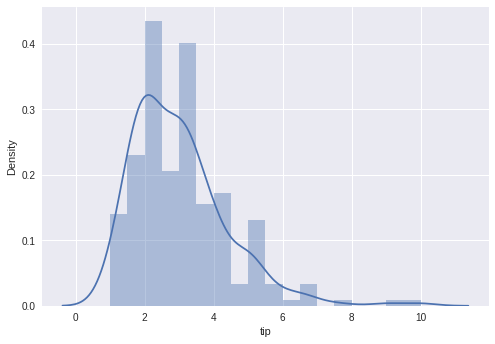

In [10]:
sns.distplot(tips_data["tip"])   #kernel density estimation
plt.show()
# it is written in o/p, this method maybe removed soon in future :(

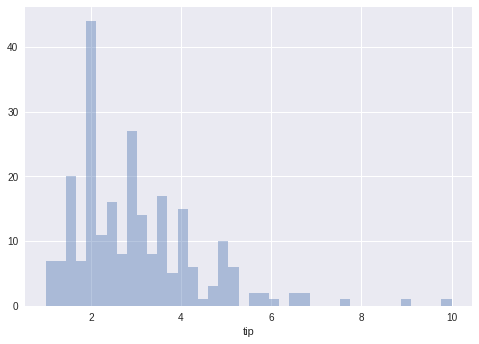

In [12]:
sns.distplot(tips_data["tip"], bins=40, kde=False)
plt.show()

### 6. KDE Plot
- It plots estimated distribution accoding to the "Kernel Density Estimation".
- KDE is a method to find density function. Full explanation of KDE is given in details of 5. distplot explanation
- It is univariate as it tells us about only single variable(tip here)

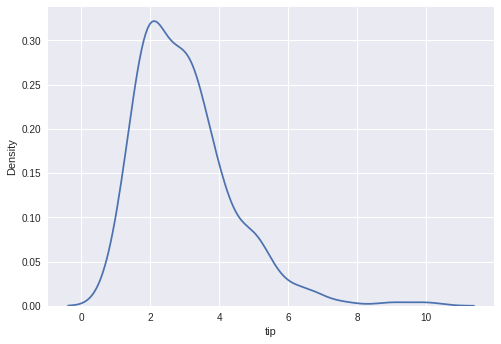

In [14]:
sns.kdeplot(tips_data["tip"])
plt.show()

### 7. Joint Plot
- It is similar to scatter plot. But more powerful than scatterplot with more features.
- It is a bivariate plot

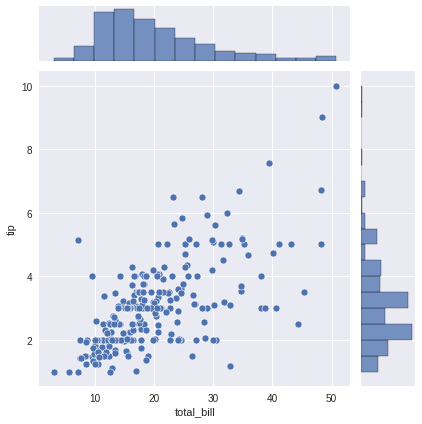

In [19]:
sns.jointplot( x= 'total_bill' , y='tip' , data=tips_data)
plt.show()

<Figure size 504x504 with 0 Axes>

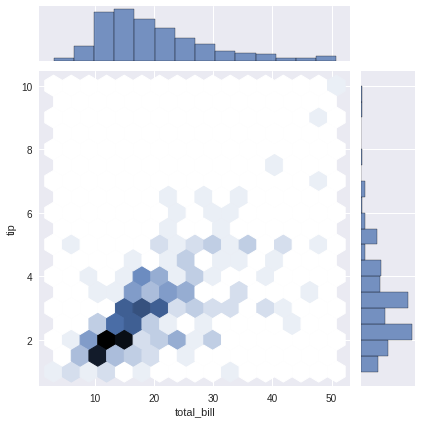

In [23]:
plt.figure(figsize=(7,7))
sns.jointplot( x= 'total_bill' , y='tip' , data=tips_data, kind='hex') #it gives all hex shapes
plt.show()

<Figure size 504x504 with 0 Axes>

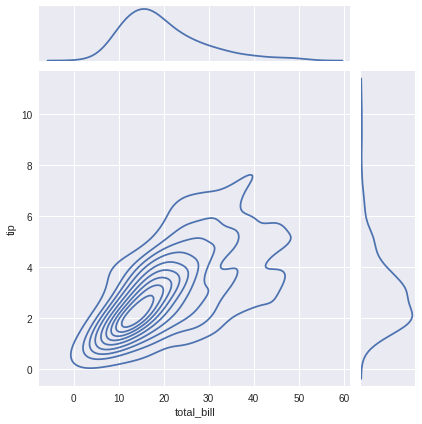

In [26]:
#another example of kind
plt.figure(figsize=(7,7))
sns.jointplot( x= 'total_bill' , y='tip' , data=tips_data, kind='kde') 
plt.show()

<Figure size 504x504 with 0 Axes>

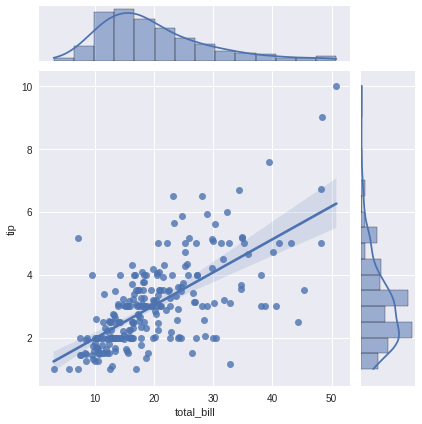

In [27]:
#another  example of kind
plt.figure(figsize=(7,7))
sns.jointplot( x= 'total_bill' , y='tip' , data=tips_data, kind='reg')
plt.show()

### 8. Pair Pot
- It is a multivariate data analysis plot.
- It takes some time to execute

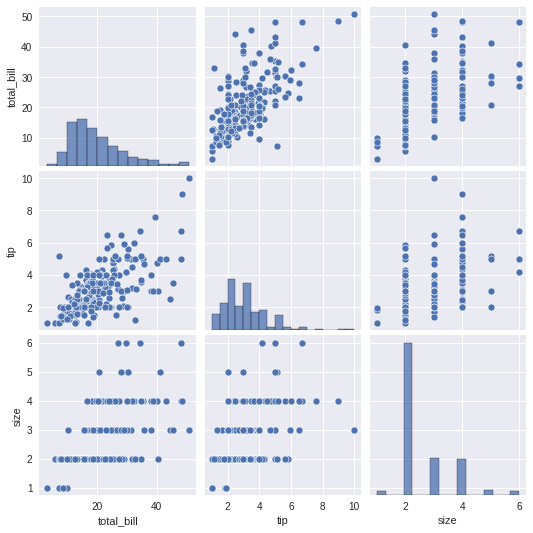

In [29]:
sns.pairplot(tips_data)
plt.show()

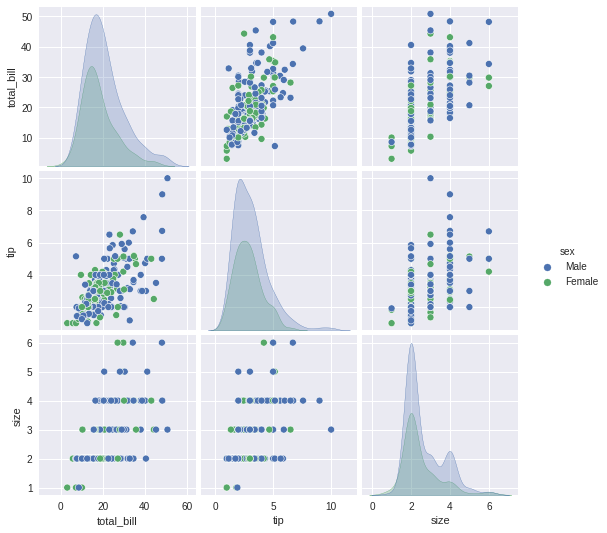

In [30]:
# pairplot woth hue parameter
sns.pairplot(tips_data, hue='sex')
plt.show()

### 9. Heatmap:
- It uses a system of color-coding to represent different values.
- For better understanding of heatmap. Let us load another dataset from online github repo of load() method:

In [33]:
flights = sns.load_dataset('flights')
print(flights)

     year month  passengers
0    1949   Jan         112
1    1949   Feb         118
2    1949   Mar         132
3    1949   Apr         129
4    1949   May         121
..    ...   ...         ...
139  1960   Aug         606
140  1960   Sep         508
141  1960   Oct         461
142  1960   Nov         390
143  1960   Dec         432

[144 rows x 3 columns]


- It is the data of the number of flights that flew on every moth from year 1949-1960

**Question: Visualize the number of passangers that flew in each month in every year.**
- For this, we need months to be passed as index and years as columns and no. of passengers as values to create a spreadsheet

In [38]:
flights.pivot_table(index="month", columns="year", values="passengers") 
# this is a pandas method that we will learn later.

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


In [39]:
# store above inside some variable
flights_pivot = flights.pivot_table(index="month", columns="year", values="passengers") 

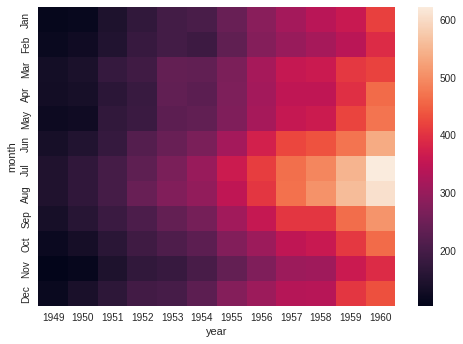

In [40]:
sns.heatmap(flights_pivot)  #pass a spreadsheet or dataframe as argument
plt.show()

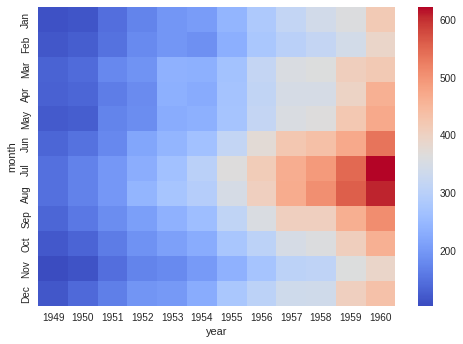

In [46]:
# we can also change colormap for the heatmap by passing 'cmap' arg
sns.heatmap(flights_pivot, cmap='coolwarm')
plt.show()

In [42]:
tips_data.corr()   # a pandas function 

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


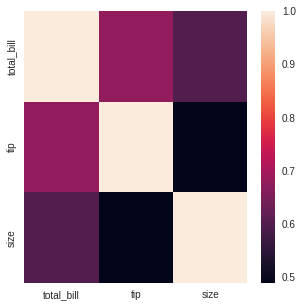

In [45]:
plt.figure(figsize=(5,5))
sns.heatmap(tips_data.corr())
plt.show()